#Alumno: Axel Alejandro Tlatoa Villavicencio - A01363351
# Clase: Ciencia y analítica de datos

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A_{1} = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A_{2} = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A_{3} = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

Antes de abordar los ejercicios me tomaré la molestia de hacer un pequeño resumen de los eigenvalores y eigenvectores, eigen del alemán o propio en español describe aquellas cantidades las cuales ante una cierta transformación te regresan la misma descripción de la componente o valor de una matriz, pero bajo un factor de escalamiento. Los eigenvalores son cantidades escalares que están asociados con un sistema de ecuaciones lineal (matriz) 

$\begin{bmatrix} a_{11} & a_{12} & a_{13} & \cdots & a_{1k} \\ a_{21} & a_{22} & a_{23} & \cdots & a_{2k} \\ a_{31} & a_{32} & a_{33} & \cdots & a_{3k} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ a_{k1} & a_{k2} & a_{k3} & \cdots & a_{kk} \end{bmatrix} \begin{bmatrix} x_{1} \\ x_{2} \\ x_{3} \\ \vdots \\x_{k} \end{bmatrix}=\lambda \begin{bmatrix} x_{1} \\ x_{2} \\ x_{3} \\ \vdots \\x_{k} \end{bmatrix}$

De igual forma para los eigenvectores pero son básicamente cantidades vectoriales. 

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print('Eigen valores:')
print(values) #D
print('Eigen vectores:')
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A) # Calcula los valores propios y los vectores propios derechos de una matriz cuadrada.

W = vectors
Winv = np.linalg.inv(W) # Calcula la inversa de W
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(W,np.dot(D,Winv))
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
Eigen valores:
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
Eigen vectores:
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


Sí da lo mismo, se puede utilizar el comando 

```
np.dot()
```
De la librería de **Numpy** o se puede implementar otro código para realizar la multiplicación matricial, pero implica ciclos *for*


In [ ]:
producto = [[sum(a * b for a, b in zip(renglones_D, columnas_Winv)) # crea tupla de términos de las multiplicaciones de cada término y su suma por renglones y columnas 
                        for columnas_Winv in zip(*Winv)]
                                for renglones_D in D]
resultado = [[sum(a * b for a, b in zip(renglones_W, columnas_producto))
                        for columnas_producto in zip(*producto)]
                                for renglones_W in W]
for r in resultado:
    print(r)

[1.0000000000000024, 2.0000000000000027, 3.000000000000004]
[3.999999999999999, 4.999999999999997, 5.999999999999999]
[6.999999999999998, 7.999999999999999, 9.0]


In [ ]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")
values, vectors = eig(A1)
print('Eigen valores:')
print(values) #D
print("-----------------------------")
print('Eigen vectores:')
print(vectors) #W

values, vectors = np.linalg.eig(A1)
W = vectors
Winv = np.linalg.inv(W) # Calcula la inversa de W
D = np.diag(values)
print("-------Matriz reconstruida-------")
B = np.dot(W,np.dot(D,Winv)).round()
print(B)

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
Eigen valores:
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
-----------------------------
Eigen vectores:
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.-0.j  1.-0.j  1.+0.j]]


No queda lo mismo porque hay valores complejos debido a la presencia de un término negativo dentro de la matriz original. La raíz de dicho término es imaginaría. Entonces en la reconstrucción aparecen números complejos $\mathbb{C}$:

$z = a+ib$ → $	\mathbb{C}$

In [ ]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")
values, vectors = eig(A2)
print('Eigen valores:')
print(values) #D
print("-----------------------------")
print('Eigen vectores:')
print(vectors) #W

values, vectors = np.linalg.eig(A2)
W = vectors
Winv = np.linalg.inv(W) # Calcula la inversa de W
D = np.diag(values)
print("-------Matriz reconstruida-------")
B = np.dot(W,np.dot(D,Winv)).round()
print(B)

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
Eigen valores:
[ 3. -2.  1.]
-----------------------------
Eigen vectores:
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]


La reconstrucción queda igual debido a que esta matriz no presenta ningún valor negativo, entonces el SEL (sistema de ecuaciones lineales) $\in$ al conjunto de los $\mathbb{R}$.

In [ ]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")
values, vectors = eig(A3)
print('Eigen valores:')
print(values) #D
print("-----------------------------")
print('Eigen vectores:')
print(vectors) #W

values, vectors = np.linalg.eig(A3)
W = vectors
Winv = np.linalg.inv(W) # Calcula la inversa de W
D = np.diag(values)
print("-------Matriz reconstruida-------")
B = np.dot(W,np.dot(D,Winv)).round()
print(B)

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
Eigen valores:
[ 6.89167094 -0.214175   -0.67749594]
-----------------------------
Eigen vectores:
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


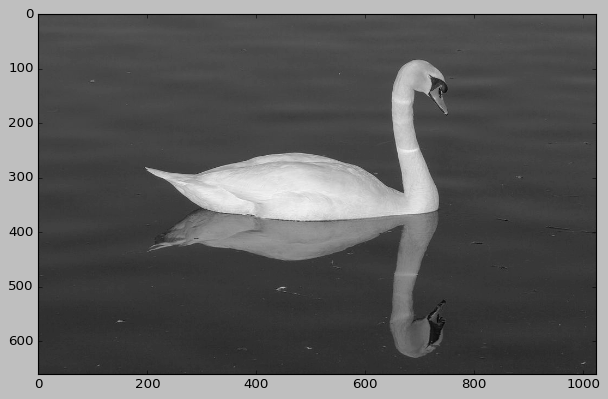

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F328BEFFC10>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

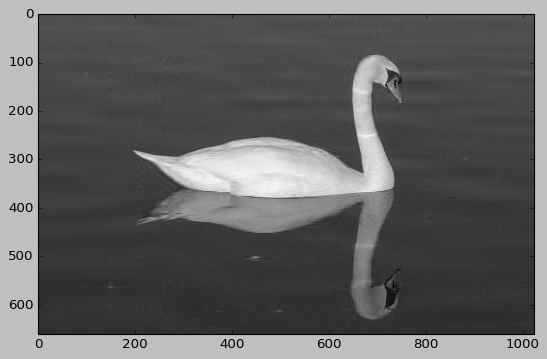

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[2. 2. 2. ... 1. 1. 1.]


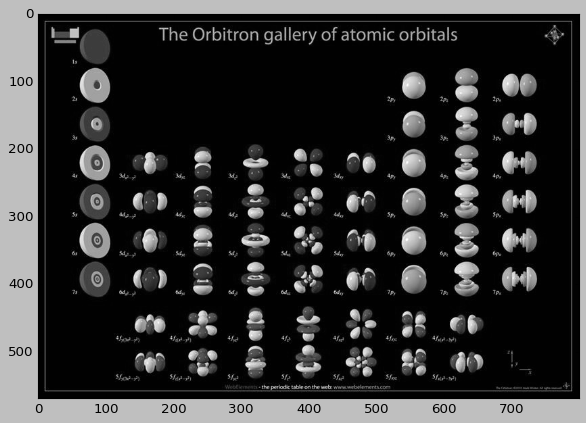

<PIL.Image.Image image mode=LA size=800x568 at 0x7FC273177E50>


In [8]:
#imagen 1: Orbitales átomo de hidrógeno
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://i.pinimg.com/originals/4b/fa/2b/4bfa2bee9532b12650b11d3845748aa8.jpg')).convert('LA')
imggray = img1.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img1)

In [9]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(568, 800)

In [11]:
U.shape

(568, 568)

In [12]:
V.shape

(800, 800)

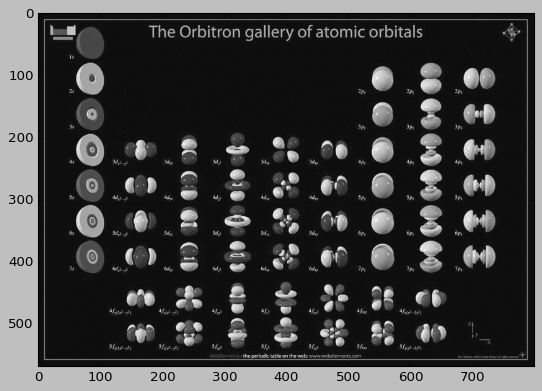

compresión del 40%


In [17]:
nvalue = 50*4
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print('compresión del 40%')

[6. 6. 6. ... 6. 6. 6.]


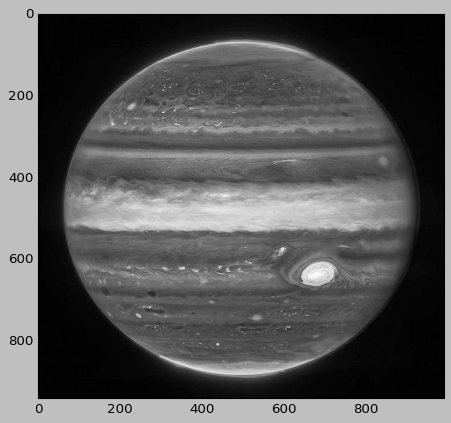

<PIL.Image.Image image mode=LA size=992x939 at 0x7FC267F1EE50>


In [23]:
#imagen 2 Júpiter

from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img2 = Image.open(urllib.request.urlopen('https://s.abcnews.com/images/Technology/jupiter-webb-telescope-02-ht-iwb-220822_1661177914746_hpEmbed_17x16_992.jpg')).convert('LA')
imggray = img2.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img2)


In [24]:
U,D,V = np.linalg.svd(imgmat)
(imgmat.shape,U.shape,V.shape)

((939, 992), (939, 939), (992, 992))

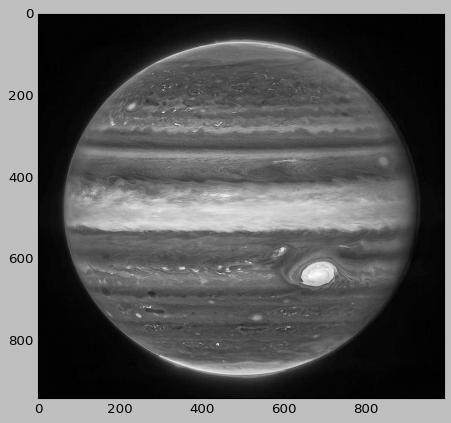

compresión del 40%


In [25]:
nvalue = 369
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print('compresión del 40%')

[11. 12. 14. ...  3.  3.  3.]


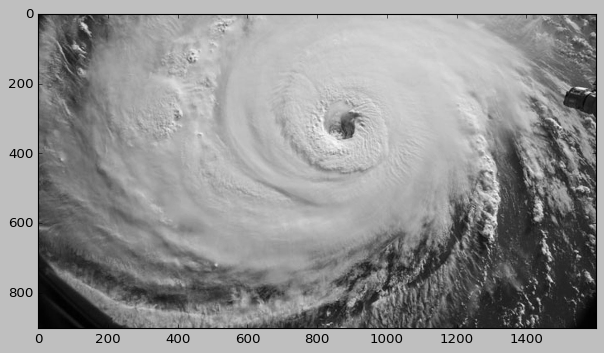

<PIL.Image.Image image mode=LA size=1600x900 at 0x7FC267DDFCD0>


In [27]:
#imagen 3 Huracán 

from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img3 = Image.open(urllib.request.urlopen('https://i0.wp.com/yaleclimateconnections.org/wp-content/uploads/2019/07/0719_Hurricane_Florence_1600.jpg?fit=1600%2C900&ssl=1')).convert('LA')
imggray = img3.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img3)
 

In [28]:
U,D,V = np.linalg.svd(imgmat)
(imgmat.shape,U.shape,V.shape)

((900, 1600), (900, 900), (1600, 1600))

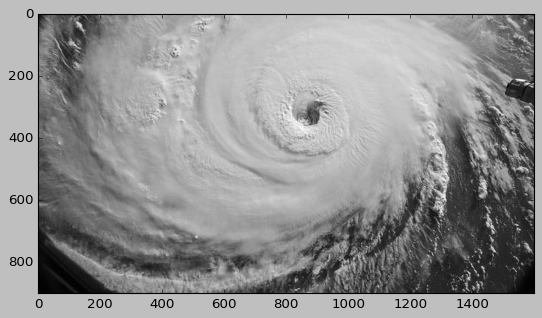

compresión del 40%


In [29]:
nvalue = 360
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print('compresión del 40%')

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# Se descarga la información (conjunto de datos):

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Z-score se estandarizan los datos 

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Standard Score:

$Z =\frac{(x-μ)}{σ}$

In [3]:
# Se modela el ACP
pca = PCA(n_components=2) # Estima dos componentes ortogonales a sí mismas
X_new = pca.fit_transform(X) # Proyecta los datos originales al espacio de PCA's

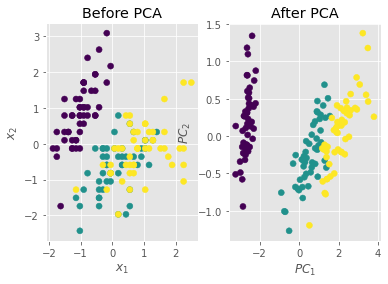

In [7]:
# Graficación de los datos antes y después 
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('$x_{1}$')
axes[0].set_ylabel('$x_{2}$')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('$PC_{1}$')
axes[1].set_ylabel('$PC_{2}$')
axes[1].set_title('After PCA')
plt.show()

In [8]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.92461872 0.05306648]


In [9]:
np.cov(X_new.T)

array([[4.22824171e+00, 5.19246362e-17],
       [5.19246362e-17, 2.42670748e-01]])

In [10]:
pca.explained_variance_

array([4.22824171, 0.24267075])

La diagonal de las variaciones contiene los eigenvalores de la covarianza. 

In [11]:
print(abs( pca.components_ ))

[[0.36138659 0.08452251 0.85667061 0.3582892 ]
 [0.65658877 0.73016143 0.17337266 0.07548102]]


Entendemos que en este caso el primer renglón representa la componente principal 1 $PCA_{1}$ y los valores más importantes son el 1, el 3 y el 4. los que aportan mayor información a dicha componente. Los valores para la segunda componente más relevantes son el 1 y el 2 $PCA_{2}$ 

Los valores absolutos de los componentes de los vectores propios correspondientes a los $k$ valores propios más grandes. En sklearn los componentes se ordenan por varianza explicada. Cuanto mayores son estos valores absolutos, más contribuye una característica específica a ese componente principal.

In [12]:
# Función del autor para visualizar las biplots:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

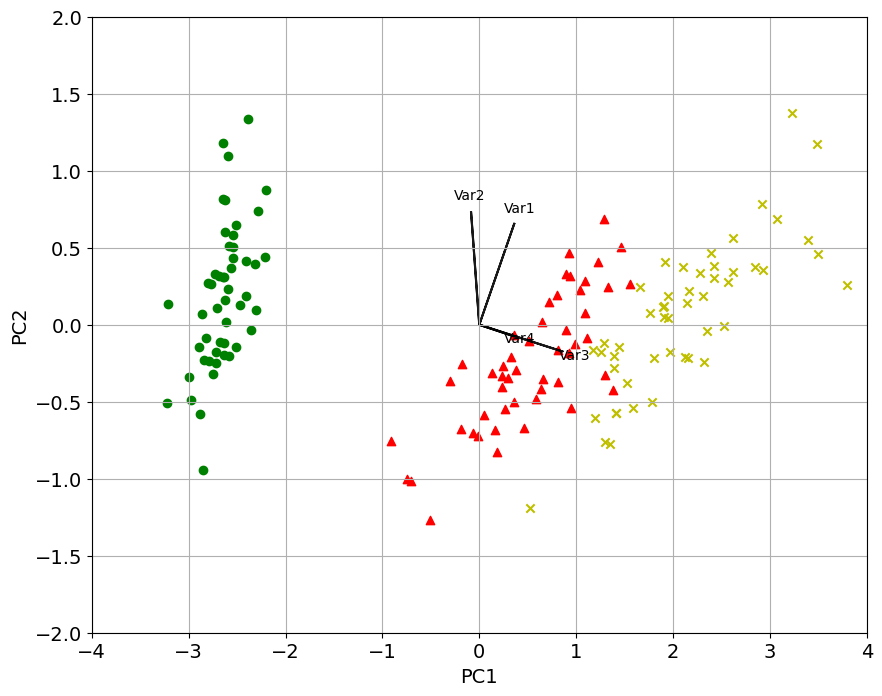

In [14]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [17]:
# Variables 3 y 4 están positivamente correlacionadas.
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957

0.9628654314027957

In [16]:
# Variables 2 y 3 están negativamente correlacionadas
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Para finalizar me gustaría resumir en sí lo que entiendo de este método explicado en mis propias palabras: el análisis de componentes principales básicamente hace un análogo a la descomposición de componentes de vectores a lo largo de ejes coordenados, es decir, sea un vector $\overrightarrow{A}$ que puede tener $n$ dimensiones: 

$\overrightarrow{A} = \alpha x_{1}+ \beta x_{2}+\delta x_{3}+...x_{n}$

Para representarlo u operar este vector con otros se descompone a lo largo de los ejes, y básicamente lo que se hace es proyectar dichos vectores generados por los datos originales a lo largo de ejes ortogonales, los cuales les llamamos componentes principales, para proyectarlos hacemos uso del producto punto, pues mapea la proyección de un vector sobre la otro mediante un escalar. Ahora el empalme de dichas descomposiciones de vectores de datos originales genera lo que pienso es la reducción de datos redundantes o bien datos que pueden explicar los mismos fenómenos dentro del conjunto de datos originales. Así es como funciona la descomposición de PCA, y para disminuir dimensiones está precisamente la proyección de las componentes sobre uno de estos ejes, lo que reduce dimensiones eficientemente, pero se pierde información de donde está exactamente la variable, por eso se dice que ganas reducción pero pierdes cierta exactitud. 

In [19]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/e/ee/Gram-Schmidt_orthonormalization_process.gif')

Pero lo que me da la pauta para entenderlo así es que estandarizamos los datos es decir los ponenemos como en norma 1 o normalizados para poder hacer las proyecciones y ver que tanto se reducen las variables. A diferencia de una simple proyección de los datos puedo asegurar que lo que queremos es maximizar la varianza de los datos y con ello cuantificar el peso de una variable sobre otra, por último creo que es un buen método pero puede que ante números complejos, es decir, otras dimensiones en un conjunto enorme de datos esto truene por la capacidad de computación limitada. 

Con todo esto en mente:

¿Qué es feature importance y para que nos sirve?

Básicamente es como un juez en una competencia, asigna una calificación de que tan bien se está realizando un pronóstico o predicción las variables de entrada, de mejor manera: se refiere a las técnicas que asignan una puntuación a las características de entrada en función de su utilidad para predecir una variable de destino. Existe gran variedad de estás técnicas, tales como los árboles de decisiones, las correlaciones estadísticas, cálculo de coeficientes usando regresiones lineales, etc. Juegan un papel importante en un proyecto de modelado predictivo, lo que incluye proporcionar información sobre los datos, información sobre el modelo y la base para la reducción de la dimensionalidad y la selección de características que pueden mejorar la eficiencia y la eficacia del modelo propuesto. Y en sí las puntuaciones son útiles y se pueden utilizar en una variedad de situaciones como para: comprender mejor los datos, comprender mejor un modelo, y reducir el número de entidades de entrada.

¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?


Primero lo más importante es definir que las variables tengan la misma proporción para que puedan ser analizadas (standard score), parte de lo que ya expliqué anteriormente sobre como funciona la técnica de PCA o análisis por componentes retiene mucha de la información y utilidad de está técnica, entonces otro hallazgo importante es sobre la contención de la diagonal de los eigenvalores sobre la matriz de covarianza y como son practicamente lo mismo. Para este ejercicio en particular que las componentes en PC1 1, 3 y 4 son las más importantes porque es donde hay mayor densidad de variables descompuestas o proyectadas sobre ese 'eje' y para la segunda componente principal ortogonal PC2 las más importantes son las 1 y 2, por lo que si tuvieramos que implementar un modelo y quisieramos despreciar las demás componentes, se podría y no se correría tanto riesgo de un gran sezgo (para optimizar el cómputo), también podemos mapear las correlaciones entre variables ya sean positivas o negativas y su inclinación hacia lel tipo de componente ortogonal propuesta por la técnica.


¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

En técnicas de reducción de dimensionalidad para generar modelos de predicción o de aprendizaje automático, si bien es muy importante saber preparar los datos como primer punto (limpieza de datos), también hay que entender que para hacer más eficiente el manejo de los datos en cuestiones computacionales, hay que saber reducir los datos redundantes y clasificarlos de tal manera que no generen más ruido del que ya existe intrínsecamente del conjunto original de datos. La aplicabilida realmente es muy amplia, tanto para cuestiones de modelado en problemas ingenieriles hasta problemas del ámbito de medicina y ciencias sociales, como conocer el color predominante en distintos meses del año según la psicología del color, o predecir diferentes pandemias a futuro con respecto a la letalidad de un virus, modelos predictivos sobre el cambio climático y el desplazamiento del deterioro en irrigación para el área de la agricultura, problemas de desdoblamiento de proteínas (procesos aleatorios predictivos), etc realmente hay muchas áreas donde se generan datos y de estos hay que saber cómo analizarlos y predecirlos. 